In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to CSV files
train_csv = '../data/fairface_label_train.csv'
val_csv   = '../data/fairface_label_val.csv'

# Load them into separate dataframes
df_train = pd.read_csv(train_csv)
df_val   = pd.read_csv(val_csv)

# Quick glance
print("Train DataFrame:\n", df_train.head())
print("\nVal DataFrame:\n", df_val.head())



Train DataFrame:
           file    age  gender        race  service_test
0  train/1.jpg  50-59    Male  East Asian          True
1  train/2.jpg  30-39  Female      Indian         False
2  train/3.jpg    3-9  Female       Black         False
3  train/4.jpg  20-29  Female      Indian          True
4  train/5.jpg  20-29  Female      Indian          True

Val DataFrame:
         file    age  gender             race  service_test
0  val/1.jpg    3-9    Male       East Asian         False
1  val/2.jpg  50-59  Female       East Asian          True
2  val/3.jpg  30-39    Male            White          True
3  val/4.jpg  20-29  Female  Latino_Hispanic          True
4  val/5.jpg  20-29    Male  Southeast Asian         False


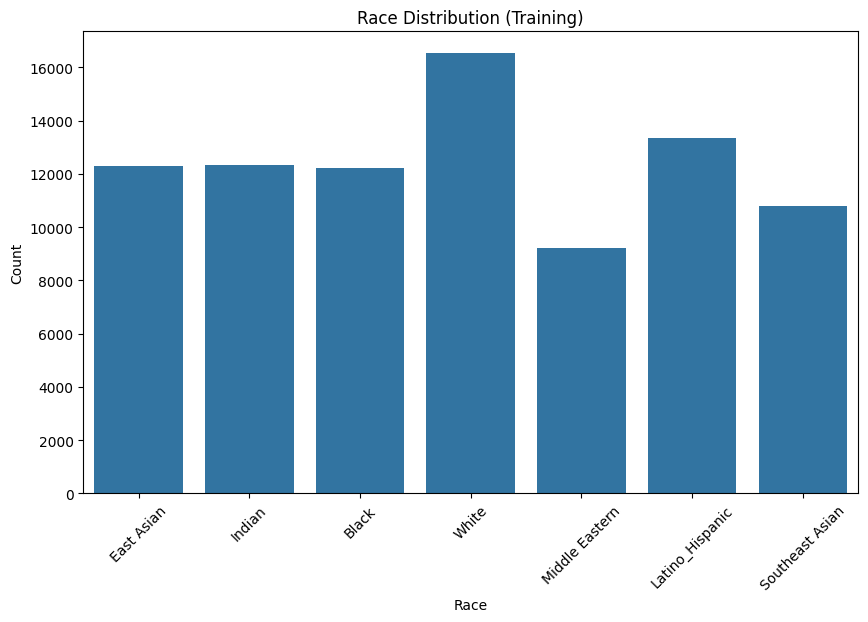

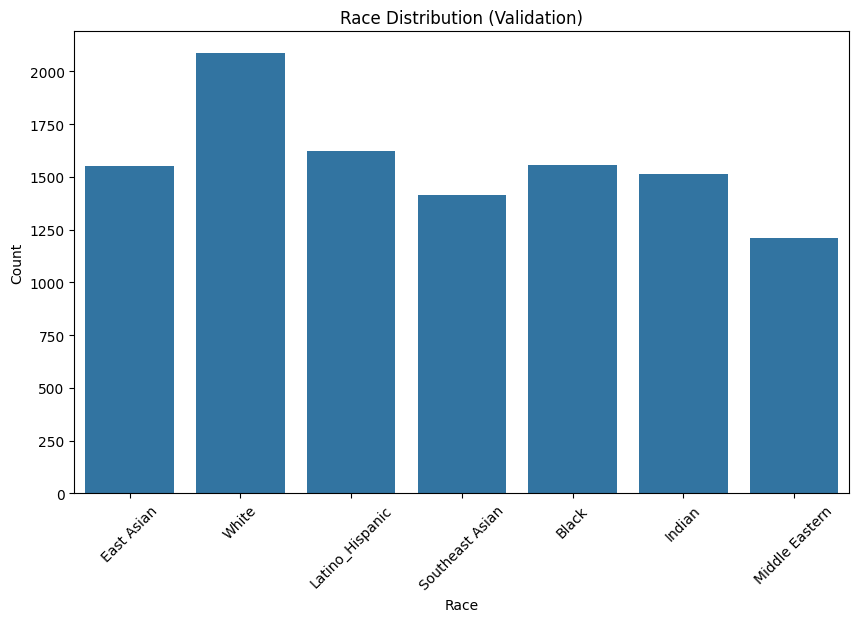

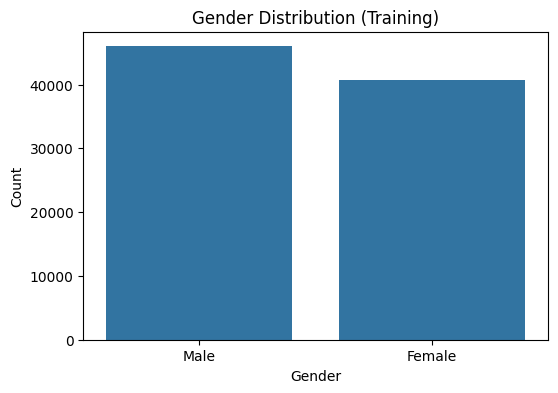

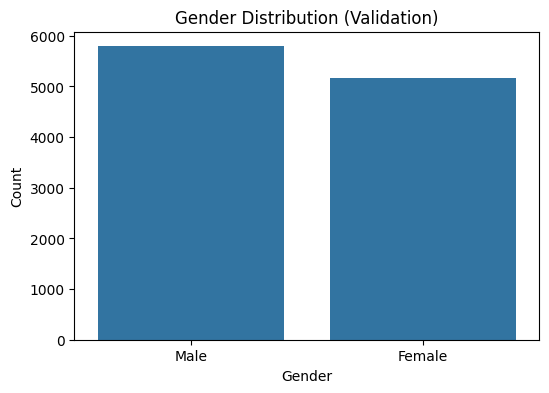

In [39]:
# Race Distribution in training data
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='race')
plt.title('Race Distribution (Training)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Race distribution in validation data
plt.figure(figsize=(10,6))
sns.countplot(data=df_val, x='race')
plt.title('Race Distribution (Validation)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Gender Distribution in training data
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='gender')
plt.title('Gender Distribution (Training)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Geneder Distribution in validation data
plt.figure(figsize=(6,4))
sns.countplot(data=df_val, x='gender')
plt.title('Gender Distribution (Validation)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

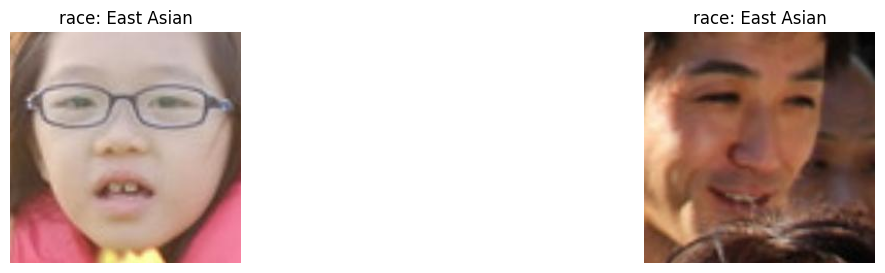

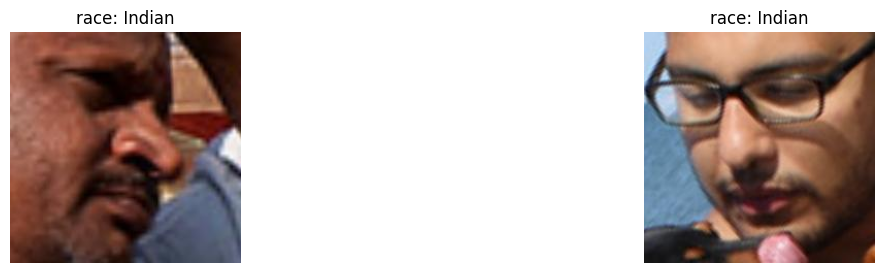

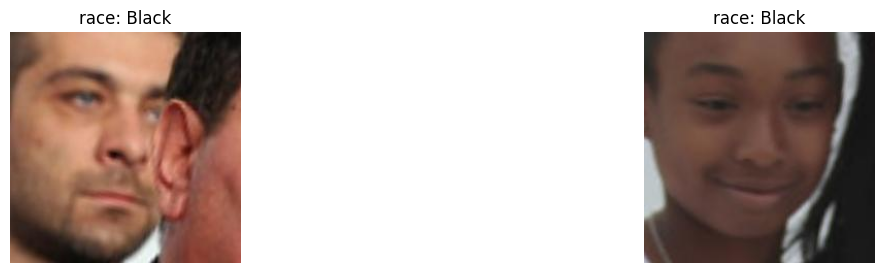

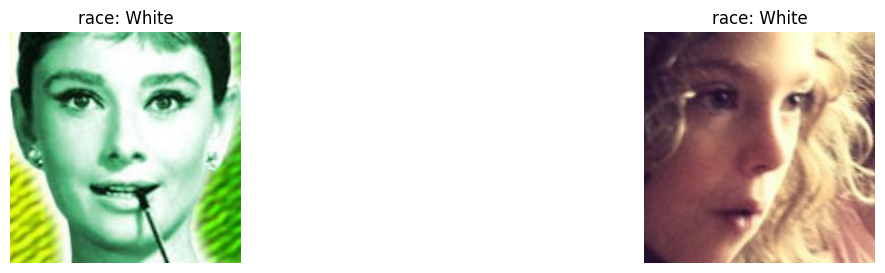

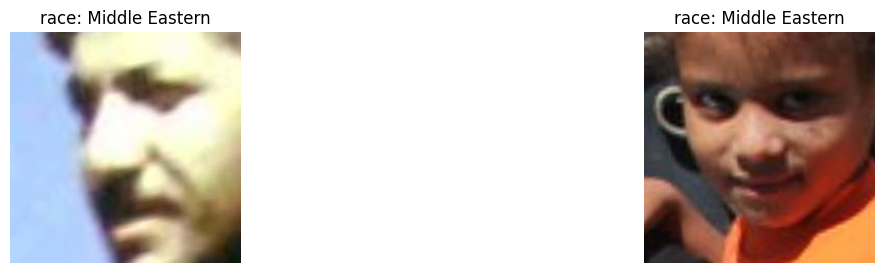

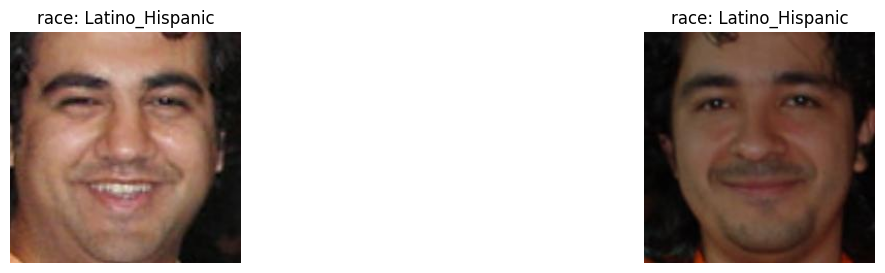

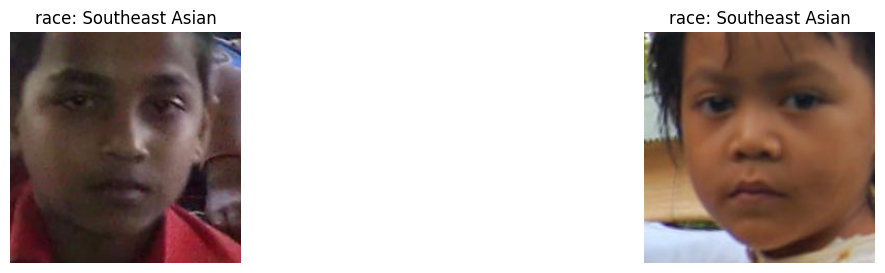

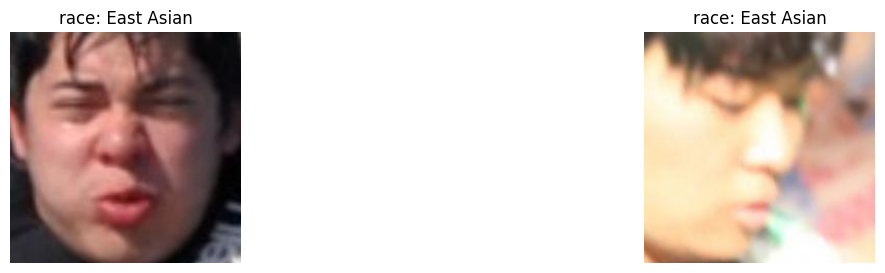

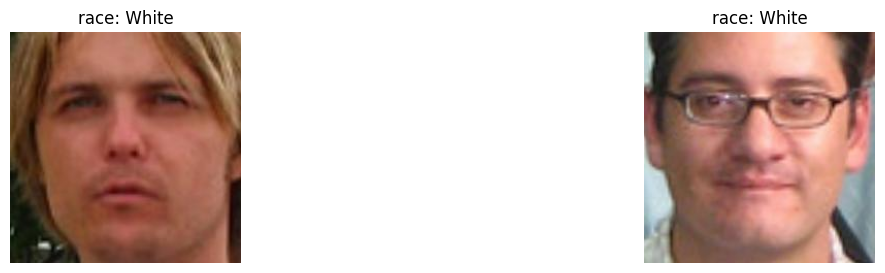

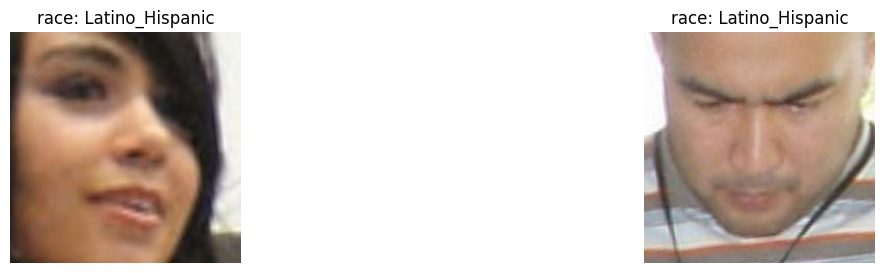

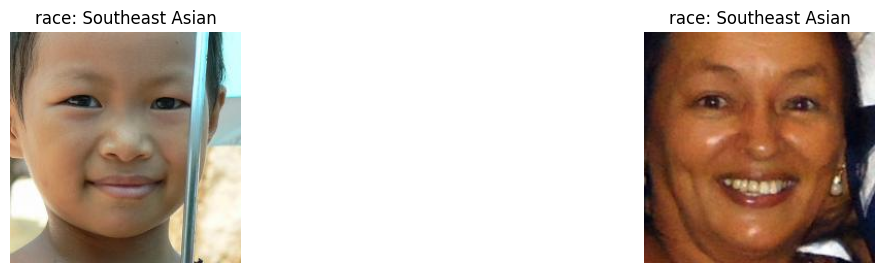

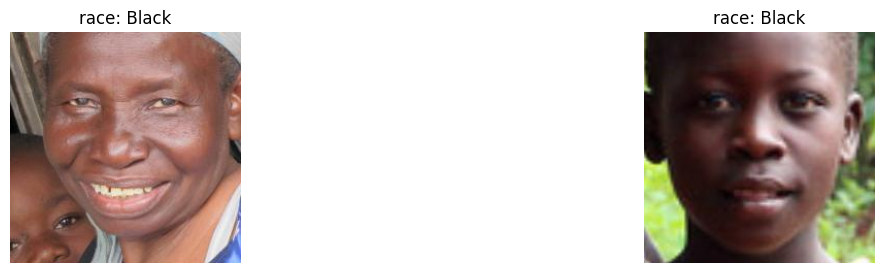

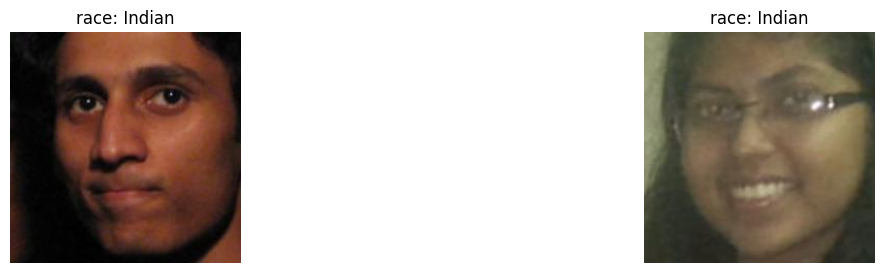

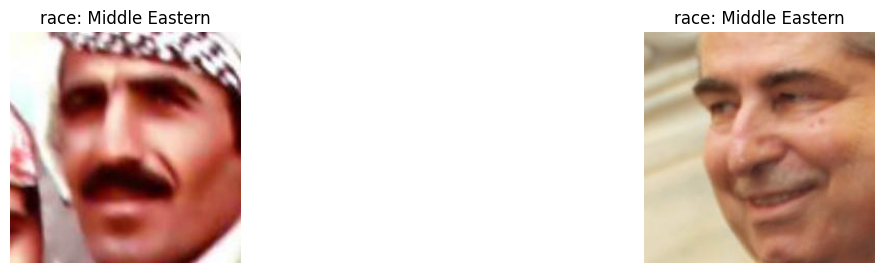

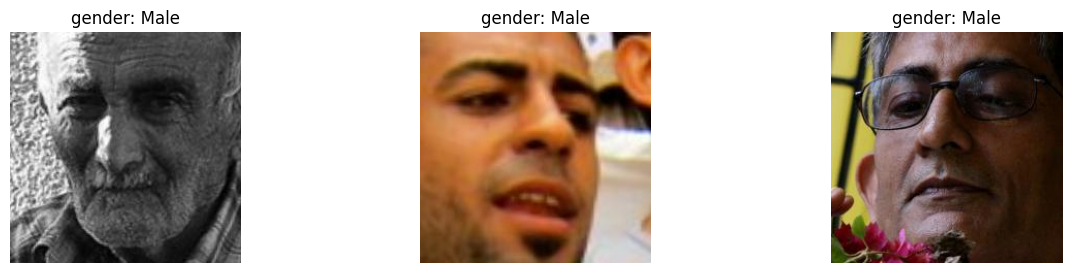

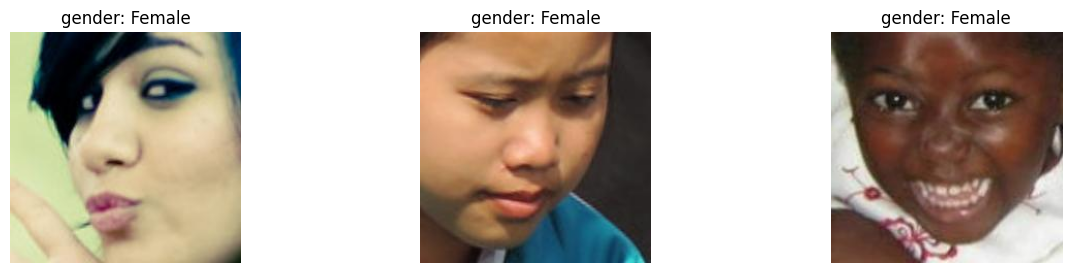

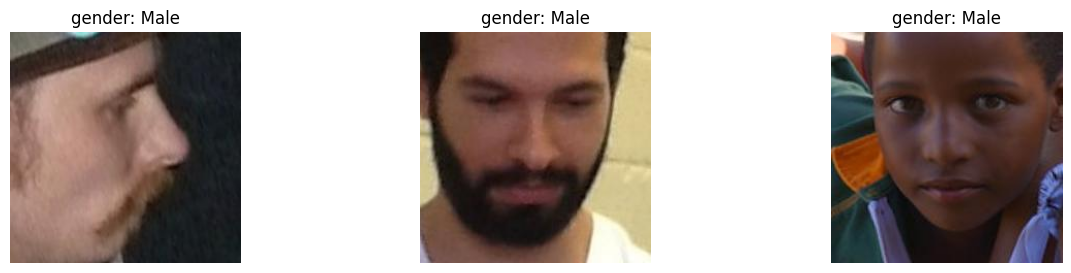

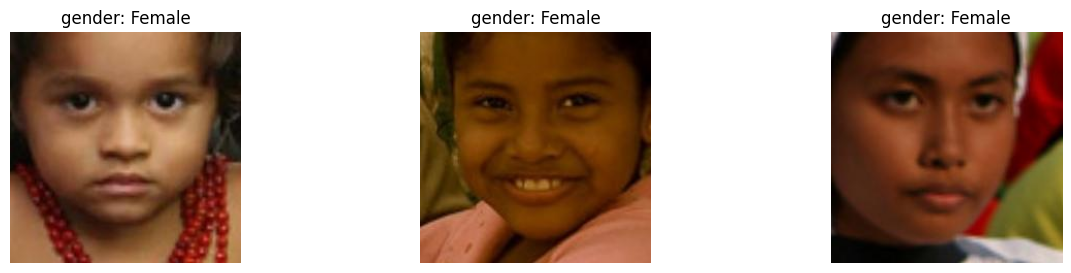

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_samples(df, label, label_value, num_samples=3):
    subset = df[df[label] == label_value].sample(n=num_samples)
    plt.figure(figsize=(15,3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img_path = row['file']  # Adjust column if needed
        # Note we prepend the folder name
        full_path = f"../data/fairface/{img_path}"
        image = cv2.imread(full_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{label}: {label_value}")
    plt.show()

# Display samples for each race category
races = df_train['race'].unique()
for race in races:
    display_samples(df_train, 'race', race, num_samples=2)

races_val = df_val['race'].unique()
for race in races_val:
    display_samples(df_val, 'race', race, num_samples=2)


# Display samples for each gender category
genders = df_val['gender'].unique()
for gender in genders:
    display_samples(df_val, 'gender', gender, num_samples=3)

genders = df_val['gender'].unique()
for gender in genders:
    display_samples(df_val, 'gender', gender, num_samples=3)



In [51]:
# Race categories
race_mapping = {
   'White': 0, 
   'Black': 1, 
   'East Asian': 2,
   'Southeast Asian': 3, 
   'Indian': 4,
   'Latino_Hispanic': 5, 
   'Middle Eastern': 6
   # Adjust if needed
}

gender_mapping = {'Male': 0, 'Female': 1}

# Apply to df_train
df_train['race_encoded'] = df_train['race'].map(race_mapping)
df_train['gender_encoded'] = df_train['gender'].map(gender_mapping)

# Apply to df_val
df_val['race_encoded'] = df_val['race'].map(race_mapping)
df_val['gender_encoded'] = df_val['gender'].map(gender_mapping)



In [52]:
df_train.to_csv('../data/fairface_label_train_encoded.csv', index=False)
df_val.to_csv('../data/fairface_label_val_encoded.csv', index=False)

Original Training Set Size: 86744
Original Validation Set Size: 8763
New Validation Set Size: 7010
Test Set Size: 1753

New validation and test sets have been saved successfully.


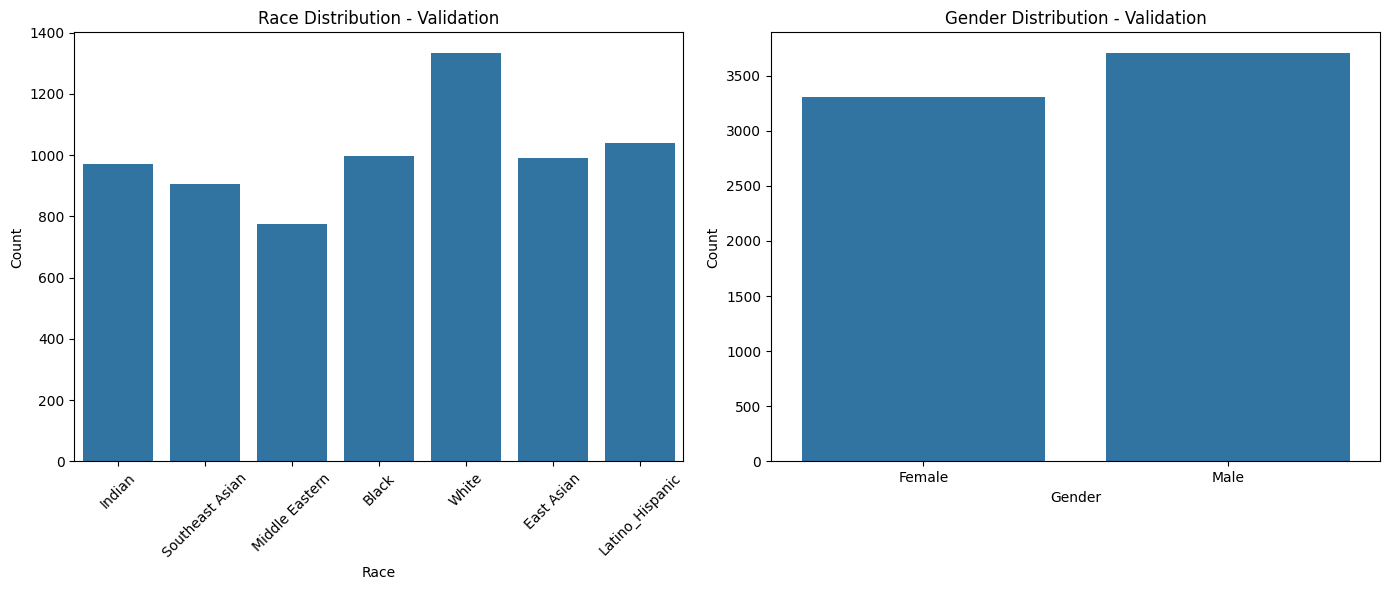

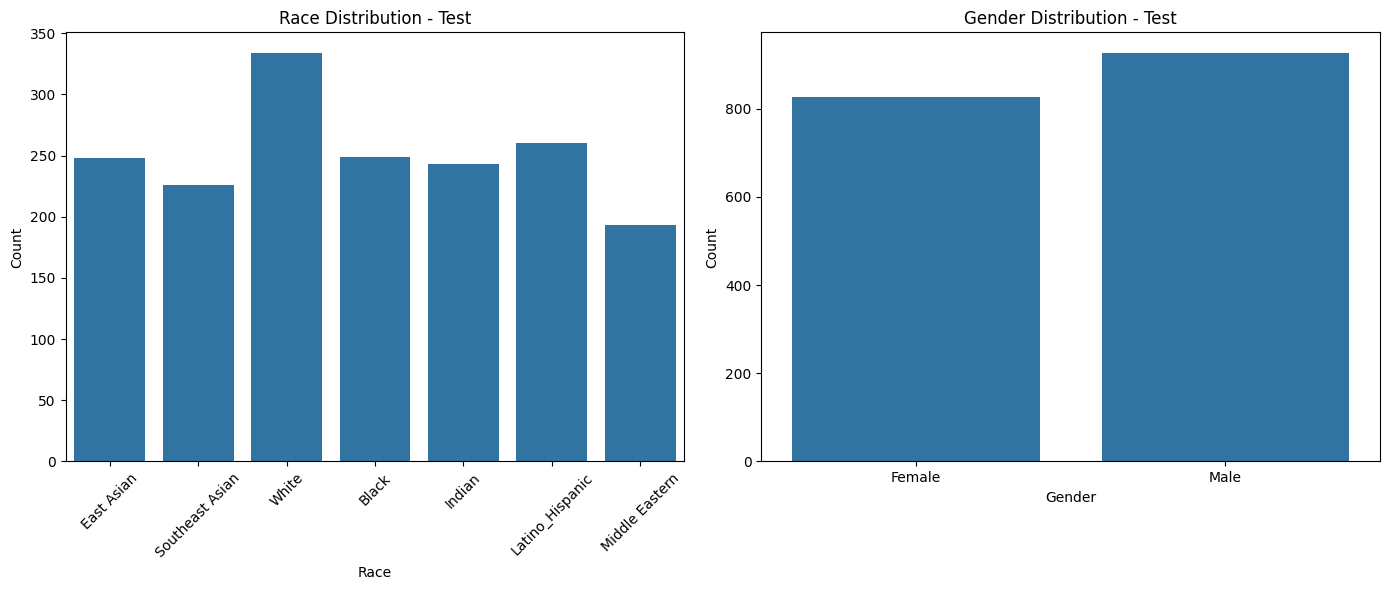

In [53]:
from sklearn.model_selection import train_test_split

# Define the test size (e.g., 20% of the original validation set)
test_size = 0.2

# Perform the split with stratification to maintain label distributions
df_val_new, df_test = train_test_split(
    df_val, 
    test_size=test_size, 
    stratify=df_val[['race_encoded', 'gender_encoded']], 
    random_state=42
)

# Reset indices
df_val_new.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Verify the sizes
print(f"Original Training Set Size: {len(df_train)}")
print(f"Original Validation Set Size: {len(df_val)}")
print(f"New Validation Set Size: {len(df_val_new)}")
print(f"Test Set Size: {len(df_test)}")

# 2.3.3 Save the New Splits as Separate CSV Files
df_val_new.to_csv('../data/fairface_label_val_encoded.csv', index=False)
df_test.to_csv('../data/fairface_label_test_encoded.csv', index=False)

print("\nNew validation and test sets have been saved successfully.")

# 2.3.4 Visualize the Distributions in the New Splits

def plot_distribution(df, split_name):
    plt.figure(figsize=(14,6))

    # Race Distribution
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='race')
    plt.title(f'Race Distribution - {split_name}')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Gender Distribution
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='gender')
    plt.title(f'Gender Distribution - {split_name}')
    plt.xlabel('Gender')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Plot distributions for the new Validation Set
plot_distribution(df_val_new, 'Validation')

# Plot distributions for the Test Set
plot_distribution(df_test, 'Test')

In [54]:
# Optional: Check overall distribution consistency
def check_distribution_consistency(original_df, new_split_df, split_name):
    print(f"\nDistribution Comparison for {split_name} Split:")
    for label in ['race', 'gender']:
        original_counts = original_df[label].value_counts(normalize=True).sort_index()
        split_counts = new_split_df[label].value_counts(normalize=True).sort_index()
        comparison = pd.DataFrame({
            'Original': original_counts,
            split_name: split_counts
        })
        print(f"\n{label.capitalize()} Distribution:")
        print(comparison)

# Compare distributions
check_distribution_consistency(df_val, df_val_new, 'Validation')
check_distribution_consistency(df_val, df_test, 'Test')


Distribution Comparison for Validation Split:

Race Distribution:
                 Original  Validation
race                                 
Black            0.142075    0.142083
East Asian       0.141504    0.141512
Indian           0.138423    0.138374
Latino_Hispanic  0.148123    0.148074
Middle Eastern   0.110350    0.110414
Southeast Asian  0.129180    0.129244
White            0.190346    0.190300

Gender Distribution:
        Original  Validation
gender                      
Female  0.471186    0.471184
Male    0.528814    0.528816

Distribution Comparison for Test Split:

Race Distribution:
                 Original      Test
race                               
Black            0.142075  0.142042
East Asian       0.141504  0.141472
Indian           0.138423  0.138620
Latino_Hispanic  0.148123  0.148317
Middle Eastern   0.110350  0.110097
Southeast Asian  0.129180  0.128922
White            0.190346  0.190531

Gender Distribution:
        Original      Test
gender             

In [55]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import os

# Initialize the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Verify that the cascade has been loaded correctly
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file.')

def detect_and_crop_face(image_path, desired_size=(224, 224)):
    """
    Detects the first face in an image, crops it, and resizes to the desired size.

    Args:
        image_path (str): Path to the image file.
        desired_size (tuple): Desired output size (width, height).

    Returns:
        cropped_resized_face (numpy.ndarray or None): The processed face image or None if no face is detected.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Unable to read image at {image_path}. Skipping.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        # No face detected
        print(f"No face detected in {image_path}. Skipping.")
        return None

    # Assume the first detected face is the primary one
    (x, y, w, h) = faces[0]
    cropped_face = image[y:y+h, x:x+w]

    # Resize the cropped face
    cropped_resized_face = cv2.resize(cropped_face, desired_size)

    return cropped_resized_face

# Create a log file to store paths of images with no detected faces
no_face_log = open('../data/no_face_detected.log', 'w')


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

train_csv_encoded = '../data/fairface_label_train_encoded.csv'
val_csv_encoded   = '../data/fairface_label_val_encoded.csv'
test_csv_encoded  = '../data/fairface_label_test_encoded.csv'  # Newly created test CSV

df_train_encoded = pd.read_csv(train_csv_encoded)
df_val_encoded   = pd.read_csv(val_csv_encoded)
df_test_encoded  = pd.read_csv(test_csv_encoded)

def preprocess_split(df, split_name, root_folder, log_file):
    """
    Processes images in a given split by detecting and cropping faces.
    Returns arrays of images, race labels, and gender labels.
    """
    processed_images, processed_races, processed_genders = [], [], []

    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Processing {split_name} split"):
        img_relative_path = row['file']
        img_full_path = os.path.join('../data/fairface', img_relative_path)

        cropped_face = detect_and_crop_face(img_full_path)
        if cropped_face is not None:
            # Convert BGR to RGB
            cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
            processed_images.append(cropped_face)
            processed_races.append(row['race_encoded'])
            processed_genders.append(row['gender_encoded'])
        else:
            log_file.write(f"{split_name}/{img_relative_path}\n")

    return np.array(processed_images), np.array(processed_races), np.array(processed_genders)

# Log file for images with no detected faces
no_face_log_path = '../data/no_face_detected.log'

with open(no_face_log_path, 'w') as no_face_log:
    # --- TRAIN ---
    train_images, train_races, train_genders = preprocess_split(df_train_encoded, 'train', 'fairface', no_face_log)
    np.save('../data/train_images.npy', train_images)
    np.save('../data/train_races.npy', train_races)
    np.save('../data/train_genders.npy', train_genders)
    print("Train images shape:", train_images.shape)

    # --- VAL ---
    val_images, val_races, val_genders = preprocess_split(df_val_encoded, 'val', 'fairface', no_face_log)
    np.save('../data/val_images.npy', val_images)
    np.save('../data/val_races.npy', val_races)
    np.save('../data/val_genders.npy', val_genders)
    print("Val images shape:", val_images.shape)

    # --- TEST ---
    test_images, test_races, test_genders = preprocess_split(df_test_encoded, 'test', 'fairface', no_face_log)
    # ^ If your test images are also in a folder called "test", change 'val' to 'test'.
    #   Make sure it matches the actual folder where your test images are stored.

    np.save('../data/test_images.npy', test_images)
    np.save('../data/test_races.npy', test_races)
    np.save('../data/test_genders.npy', test_genders)
    print("Test images shape:", test_images.shape)
